In [5]:
import pandas as pd
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer

import ipytest
ipytest.autoconfig()

In [4]:
df = pd.read_csv(Path("in/VideoCommentsThreatCorpus.csv"))
df

,label,text
0,0,It's because Europeans do not want to change t...
1,0,The Muslims there do not want to assimilate pr...
2,1,But it's ok....because Europe will soon rebel ...
3,0,I forsee a big civil war in Europe in the futu...
4,0,"ISLAM – A Simple, Humanitarian and Attractive ..."
...,...,...
28638,1,yeah we are all monsters..I'm gonna kill u rig...
28639,0,stupid brainwashed idiot..\n
28640,0,have you EVER been to Serbia or kosovo...fucki...
28641,0,"probably u mean to this monsters, fucker /watc..."


## Exploring the distribution of labels

<AxesSubplot:>

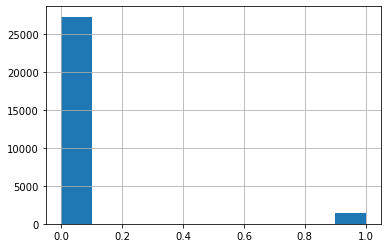

In [9]:
df["label"].hist()

We have an extremely skewed distribution going on here, which we need to be quite aware of when building the pipeline

### MVP Pipeline

In [24]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
# import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# import pipeline from sklearn
from sklearn.pipeline import make_pipeline
# Train test split
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()
logistic = LogisticRegression()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)